In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import csv

Mount to user drive.
User should add generated test files to their google drive if they haven't already.

In [ ]:
drive.mount('/content/drive')

Load the data into the as a numpy array from the folder with the data files.
User should change the drive address to the location their test data is stored.

In [ ]:
def load_data_row(file, row_val):
  data = []
  with open(file, newline='') as csvfile:
    data = list(csv.reader(csvfile))
  # remove column labels
  data = data[1:]
  # sort and convert to numpy arrays
  data = np.asarray([np.asarray([float(row[1]) for row in data if row[0] == str(bet_count)], dtype=object) for bet_count in row_val], dtype=object)
  return data

In [ ]:
def load_data(title, col_val, row_val):
  data = np.asarray([load_data_row("/content/drive/MyDrive/Roulette/data/data_" + title + str(col) + "_percent.csv", row_val) for col in col_val], dtype=object)
  return data

In [ ]:
# modify these
col_val = [num for num in range(5,55,5)]
row_val = [num for num in range(2,11)]
col_labels = [str(percent) + " percent" for percent in col_val]
row_labels = [str(bets) + " bets" for bets in row_val]
norm_row_val = [6,8,14]
norm_row_labels = [str(bets) + " bets" for bets in norm_row_val]
sim_count = 1000
bal = 1000

Helper functions used to calculated the ROI and win percentage of a simulation sequence.

ROI: Tells us if a simulation was profitable (ending balance) / (starting balance)

Win Percentage: Tells us what percentage of the simulations were profitable and which ones were not

In [ ]:
roi_percent_func = lambda data, sim_count, start_bal: sum(data) / (sim_count * start_bal)
win_percent_func = lambda data, sim_count, start_bal: len([item for item in data if item > start_bal]) / sim_count

Compute the arrays of the outcomes of the simulation data for the given function.

Reduces the 3 dim arrays to 2 dim arrays.

In [ ]:
def calc_func_data(data, col_val, row_val, analysis_func, sim_count, start_bal):
  data_out = np.zeros((len(row_val), len(col_val)))
  for j, percent_block in enumerate(data):
    for i, seq in enumerate(percent_block):
      data_out[i, j] = analysis_func(seq, sim_count, start_bal)
  return data_out

Load in the data for each simulation type.

General (gen): Each betting sequence is split into equal parts, i.e. each of the bets sizes in the starting sequence are the same size, [10,10,10,10,10]. There were a total of 9 bet sequences (of size 2-10 bets). Each sequence was run for each profitability level of 5-50% (total 10).

Normal (norm): Each betting sequence is split into intervals using the percentage splits in a normal distribution for different standard deviation splits (1 std, 0.5 std, etc). There were a total of 3 bet sequences of sizes (6,8,14). Each sequence was run for each profitability level of 5-50% (total 10).

Pascal (pascal): Each betting sequence is split into intervals using pascals triangle (with a row length equal the size of bets). Each element in the sequence is divided by the total sum of the elements in the sequence. There were a total of 9 bet sequences (of size 2-10 bets). Each sequence was run for each profitability level of 5-50% (total 10).

# Why use Pascal?
The terms in pascals triangle come from a binomial expansion, thus forming a binomial distribution. A binomial distribution is the discrete version of a normal distribution. Although this data is continuous, bet sizes can increase to POSITIVE_INFINITY and decrease to ZERO, since we are only looking to find the best starting bet sequence (discrete), pascals triangle is a good representation of this. Pascals triangle (binomial distribution) can also be found inside a simulation called a Galton Board which is used to demonstrate a binomial distribution and has also been used in some gambling games (Pachinko).

In [ ]:
gen_data = load_data("", col_val, row_val)
norm_data = load_data("norm_", col_val, norm_row_val)
pascal_data = load_data("pascal_", col_val, row_val)

Run win perctanges for each simulation.

In [ ]:
norm_data_win = calc_func_data(norm_data, col_val, norm_row_val, win_percent_func, sim_count, bal)
gen_data_win = calc_func_data(gen_data, col_val, row_val, win_percent_func, sim_count, bal)
pascal_data_win = calc_func_data(pascal_data, col_val, row_val, win_percent_func, sim_count, bal)

Run ROI for each simulation.

In [ ]:
norm_data_roi = calc_func_data(norm_data, col_val, norm_row_val, roi_percent_func, sim_count, bal)
gen_data_roi = calc_func_data(gen_data, col_val, row_val, roi_percent_func, sim_count, bal)
pascal_data_roi = calc_func_data(pascal_data, col_val, row_val, roi_percent_func, sim_count, bal)

# Plots for ROI

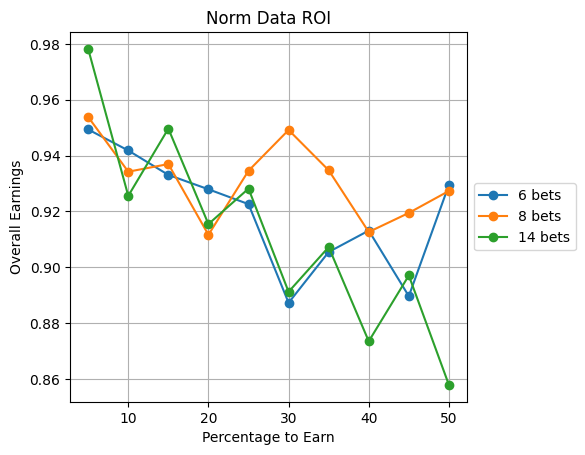

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(norm_data_roi)):
  plt.plot(col_val, norm_data_roi[i], marker='o',label=str(norm_row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Overall Earnings")
ax.set_title("Norm Data ROI")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

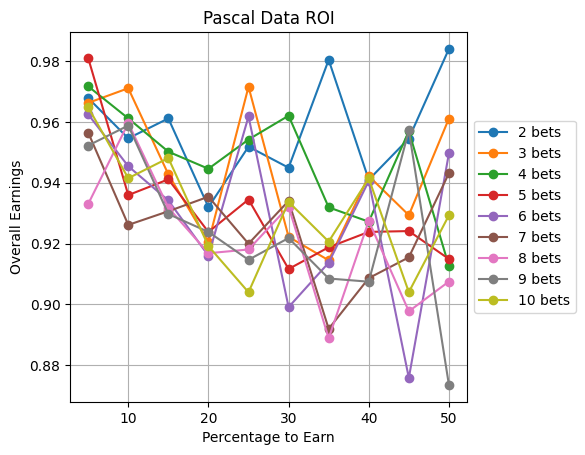

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(pascal_data_roi)):
  ax.plot(col_val, pascal_data_roi[i], marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Overall Earnings")
ax.set_title("Pascal Data ROI")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

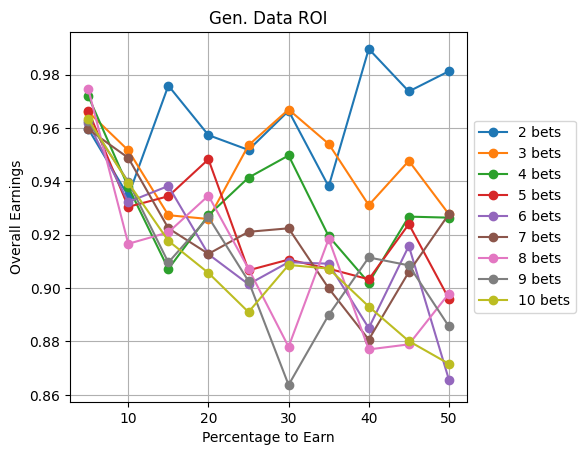

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(gen_data_roi)):
  ax.plot(col_val, gen_data_roi[i], marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Overall Earnings")
ax.set_title("Gen. Data ROI")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

# Plots for Win-Percentage

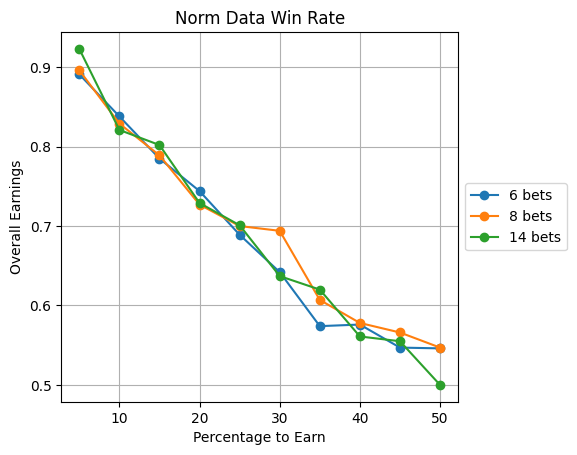

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(norm_data_win)):
  plt.plot(col_val, norm_data_win[i], marker='o',label=str(norm_row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Norm Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

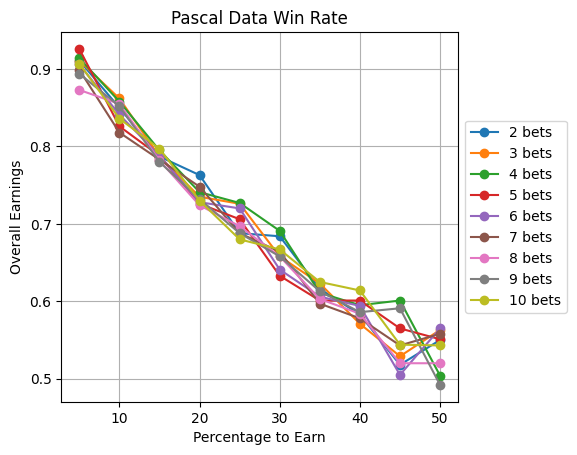

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(pascal_data_win)):
  ax.plot(col_val, pascal_data_win[i], marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Pascal Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

In [1]:
fig = plt.figure()
ax = plt.subplot(111)
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(gen_data_win)):
  ax.plot(col_val, gen_data_win[i], marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Gen. Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

NameError: name 'plt' is not defined

# Brief Analysis of Win-Rate
As expected, and as shown, the more that a player desires to win (as a percentage of starting balance), the lower their win-rate. This is expected because larger bet sizes make each game more impactful to making a profit or going bust, which reduces the effectiveness of the Split Martingale system (Reducing the odds to the original odds of roulette ~47% win for bets on single color). We can also see that as the percentage to earn increases, it appears to taper off at ~50% which is approximately the odds of winning in roulette by betting on a single color without the Split Martingale system.

Additionally, it appears that the number of bets made for each betting type did not have a major impact on the win-rate of the player, however, a general trend that more bets leads to a lower win-rate than less bets. Again, this makes sense given how the Split Martingale system works. When a betting sequence becomes long, it takes the player more games to reach the desired profitability. Given that each game still has a win chance of ~47% having more games to play only reduces our chances of reaching the desired profit by having to play more games.

Area for future research:

A more interesting point to look at in regards to number of bets would be the variance of win-rate. There is likely an optimal bet size that reduces the variance of win-rate between individual games.

# ROI Tables

In [ ]:
norm_roi_df = pd.DataFrame(
    norm_data_roi,
    index=norm_row_labels,
    columns=col_labels
)
norm_roi_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
6 bets,0.949330,0.941808,0.933056,0.927909,0.922590,0.887246,0.905441,0.913112,0.889623,0.929485
8 bets,0.953811,0.934209,0.936944,0.911602,0.934542,0.949152,0.934724,0.912613,0.919445,0.927310
14 bets,0.978194,0.925550,0.949635,0.915441,0.928143,0.891179,0.907211,0.873458,0.897034,0.857823


In [ ]:
pascal_roi_df = pd.DataFrame(
    pascal_data_roi,
    index=row_labels,
    columns=col_labels
)
pascal_roi_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
2 bets,0.967850,0.954600,0.961150,0.932000,0.951875,0.944950,0.980400,0.941000,0.954550,0.984000
3 bets,0.966263,0.971075,0.942775,0.920500,0.971562,0.922225,0.914512,0.942200,0.929350,0.961125
4 bets,0.971706,0.961163,0.950219,0.944600,0.954219,0.962050,0.931925,0.927200,0.956969,0.912625
5 bets,0.981016,0.935950,0.941125,0.923813,0.934500,0.911650,0.918800,0.923850,0.924119,0.914937
6 bets,0.962483,0.945441,0.934187,0.916025,0.961805,0.899116,0.913725,0.940600,0.875856,0.949688
7 bets,0.956509,0.926150,0.930637,0.935419,0.919965,0.934037,0.891981,0.908650,0.915491,0.943125
8 bets,0.933006,0.959616,0.931803,0.916841,0.918066,0.932172,0.888889,0.927447,0.897737,0.907539
9 bets,0.952239,0.958807,0.929722,0.923833,0.914676,0.921828,0.908528,0.907480,0.957185,0.873547
10 bets,0.964799,0.941498,0.948127,0.919167,0.904009,0.933702,0.920666,0.941426,0.904045,0.929298


In [ ]:
gen_roi_df = pd.DataFrame(
    gen_data_roi,
    index=row_labels,
    columns=col_labels
)
gen_roi_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
2 bets,0.959675,0.934500,0.975850,0.957300,0.951750,0.966400,0.938050,0.989600,0.973675,0.981250
3 bets,0.966050,0.951600,0.927300,0.925867,0.953500,0.966900,0.954033,0.931067,0.947650,0.927667
4 bets,0.971988,0.937900,0.907150,0.927250,0.941375,0.949675,0.919412,0.902000,0.926763,0.926375
5 bets,0.966520,0.930440,0.934390,0.948240,0.906650,0.910660,0.907250,0.903280,0.923950,0.896000
6 bets,0.961908,0.932233,0.938250,0.912667,0.901417,0.909700,0.909117,0.885000,0.915775,0.865667
7 bets,0.959529,0.948786,0.922407,0.912800,0.921071,0.922386,0.899900,0.880686,0.906014,0.927714
8 bets,0.974700,0.916575,0.920875,0.934625,0.907219,0.877975,0.918406,0.877000,0.878894,0.897938
9 bets,0.962517,0.939844,0.909583,0.926556,0.902583,0.863700,0.889906,0.911467,0.908500,0.885611
10 bets,0.963315,0.939450,0.917695,0.905660,0.891000,0.908650,0.907285,0.893080,0.880120,0.871600


# Win Percentage Tables

In [ ]:
norm_win_df = pd.DataFrame(
    norm_data_win,
    index=norm_row_labels,
    columns=col_labels
)
norm_win_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
6 bets,0.891,0.838,0.785,0.744,0.689,0.642,0.574,0.576,0.547,0.546
8 bets,0.896,0.829,0.789,0.727,0.700,0.694,0.607,0.578,0.566,0.547
14 bets,0.923,0.821,0.802,0.729,0.701,0.637,0.620,0.561,0.555,0.500


In [ ]:
pascal_win_df = pd.DataFrame(
    pascal_data_win,
    index=row_labels,
    columns=col_labels
)
pascal_win_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
2 bets,0.911,0.850,0.787,0.763,0.688,0.684,0.616,0.583,0.518,0.550
3 bets,0.911,0.862,0.787,0.735,0.726,0.658,0.623,0.571,0.529,0.563
4 bets,0.914,0.858,0.795,0.741,0.727,0.691,0.611,0.595,0.601,0.504
5 bets,0.926,0.826,0.788,0.726,0.706,0.633,0.601,0.601,0.565,0.551
6 bets,0.906,0.841,0.788,0.728,0.720,0.641,0.606,0.594,0.505,0.565
7 bets,0.899,0.818,0.783,0.748,0.688,0.664,0.597,0.578,0.543,0.558
8 bets,0.873,0.855,0.782,0.724,0.697,0.658,0.603,0.584,0.520,0.520
9 bets,0.894,0.852,0.780,0.732,0.688,0.658,0.613,0.586,0.591,0.492
10 bets,0.907,0.836,0.797,0.730,0.680,0.667,0.625,0.614,0.544,0.543


In [ ]:
gen_win_df = pd.DataFrame(
    gen_data_win,
    index=row_labels,
    columns=col_labels
)
gen_win_df

,5 percent,10 percent,15 percent,20 percent,25 percent,30 percent,35 percent,40 percent,45 percent,50 percent
2 bets,0.904,0.833,0.803,0.785,0.688,0.705,0.580,0.636,0.540,0.543
3 bets,0.909,0.847,0.765,0.754,0.704,0.721,0.630,0.564,0.586,0.574
4 bets,0.916,0.830,0.760,0.750,0.714,0.680,0.607,0.597,0.542,0.546
5 bets,0.910,0.822,0.789,0.761,0.694,0.637,0.626,0.579,0.576,0.538
6 bets,0.905,0.827,0.785,0.722,0.679,0.662,0.623,0.575,0.567,0.500
7 bets,0.901,0.842,0.774,0.731,0.703,0.667,0.609,0.572,0.567,0.541
8 bets,0.920,0.809,0.775,0.752,0.689,0.628,0.622,0.575,0.537,0.549
9 bets,0.905,0.837,0.761,0.740,0.683,0.622,0.608,0.597,0.576,0.531
10 bets,0.907,0.835,0.771,0.724,0.680,0.653,0.628,0.588,0.553,0.537


# Can this system be profitable in the long run?

The highest ROI in my simulations was 98% so it seems like it might be possible to be profitable in the long run. Instead of running more simulations and randomly testing, we should see what win-perctage (percentage of making desired profit in a game) we need for each profitability level.

We can do this using a Bernulli Random Variable.
$$ X=   \left\{
\begin{array}{ll}
      1,000 *(1 + profit_{percent}) & \text{with probability } w_{percent} \\
      -1,000 & \text{with probability } 1 - w_{percent} \\
\end{array} 
\right.  $$

Therefore the expected value is:

$$E[X] =  1,000 *(1 + profit_{percent})*w_{percent} -1,000*(1 - w_{percent})$$

If we can find a value of $profit_{percent}$ and for $w_{percent}$ where $E[X]>0$ then we have found a long term profitable pair of variables.


In [2]:
roi = [round(x / 100, 2) for x in range(5,55,5)]
win_rate = [round(1.0  - (x / 100),2) for x in range(0,100)]

min_val_dict = {}
x_val = []
y_val = []
for r in roi:
    min_rate = 1 # initially set to 100%
    for win in win_rate:
        if 1000 * (1 + r) * (win) - 1000 * (1 - win) > 1000:
            if win < min_rate:
                min_rate = win
    key = str(int(r * 100)) + " percent"
    x_val.append(r*100)
    y_val.append(min_rate)
    min_val_dict[key] = min_rate
print(min_val_dict)

{'5 percent': 0.98, '10 percent': 0.96, '15 percent': 0.94, '20 percent': 0.91, '25 percent': 0.89, '30 percent': 0.87, '35 percent': 0.86, '40 percent': 0.84, '45 percent': 0.82, '50 percent': 0.81}


# Replotting Win-Rate with Threshhold

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x_val, y_val,label="Threshhold")
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(norm_data_win)):
  plt.plot(col_val, norm_data_win[i], marker='o',label=str(norm_row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Norm Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x_val, y_val,label="Threshhold")
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(pascal_data_win)):
  ax.plot(col_val, pascal_data_win[i],marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Pascal Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x_val, y_val,label="Threshhold")
# let the y axis be the metric (profitability/win percent) let x be the number of bets made
# let data sets be the percentage of desired winnings
for i in range(0, len(gen_data_win)):
  ax.plot(col_val, gen_data_win[i], marker='o',label=str(row_labels[i]))
ax.set_xlabel("Percentage to Earn")
ax.set_ylabel("Win-Rate")
ax.set_title("Gen. Data Win Rate")
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()

Look at the values that are close to, at, or greater than our necessary minimum win rate for each desired profitability

In [ ]:
x_mod = 0.93 # finds values that are no less than 7% of the desired amount (trying to find the closest values in each column, could be any percent)

for col in col_labels:
  print(col)
  print(pascal_win_df[(pascal_win_df[col] > (min_val_dict[col] * x_mod))][col])

5 percent
4 bets    0.914
5 bets    0.926
Name: 5 percent, dtype: float64
10 percent
Series([], Name: 10 percent, dtype: float64)
15 percent
Series([], Name: 15 percent, dtype: float64)
20 percent
Series([], Name: 20 percent, dtype: float64)
25 percent
Series([], Name: 25 percent, dtype: float64)
30 percent
Series([], Name: 30 percent, dtype: float64)
35 percent
Series([], Name: 35 percent, dtype: float64)
40 percent
Series([], Name: 40 percent, dtype: float64)
45 percent
Series([], Name: 45 percent, dtype: float64)
50 percent
Series([], Name: 50 percent, dtype: float64)


In [ ]:
for col in col_labels:
  print(col)
  print(gen_win_df[(gen_win_df[col] > (min_val_dict[col] * x_mod))][col])

5 percent
4 bets    0.916
8 bets    0.920
Name: 5 percent, dtype: float64
10 percent
Series([], Name: 10 percent, dtype: float64)
15 percent
Series([], Name: 15 percent, dtype: float64)
20 percent
Series([], Name: 20 percent, dtype: float64)
25 percent
Series([], Name: 25 percent, dtype: float64)
30 percent
Series([], Name: 30 percent, dtype: float64)
35 percent
Series([], Name: 35 percent, dtype: float64)
40 percent
Series([], Name: 40 percent, dtype: float64)
45 percent
Series([], Name: 45 percent, dtype: float64)
50 percent
Series([], Name: 50 percent, dtype: float64)


In [ ]:
for col in col_labels:
  print(col)
  print(norm_win_df[(norm_win_df[col] > (min_val_dict[col] * x_mod))][col])

5 percent
14 bets    0.923
Name: 5 percent, dtype: float64
10 percent
Series([], Name: 10 percent, dtype: float64)
15 percent
Series([], Name: 15 percent, dtype: float64)
20 percent
Series([], Name: 20 percent, dtype: float64)
25 percent
Series([], Name: 25 percent, dtype: float64)
30 percent
Series([], Name: 30 percent, dtype: float64)
35 percent
Series([], Name: 35 percent, dtype: float64)
40 percent
Series([], Name: 40 percent, dtype: float64)
45 percent
Series([], Name: 45 percent, dtype: float64)
50 percent
Series([], Name: 50 percent, dtype: float64)


The betting sequences starting with 4 bets are the closest in the gen_win_df and pascal_win_df we need to be profitable long term. Therefore, we will try and raise the win percentage for this sequence (when trying to earn 5%)

Additionally, we will also try bet sequences of 5 since this is also close in sequence length and in win percentage for both general and pascal style bet sequences.

# Conclusion

After some non included testing, increasing the win percentage of the selected bet bet sequence and profitability percent was proving unsuccessful by simply modifying the bet pattern. This either means that changing the individual bet sizes ($ value of each) has has little effect on the win-percentage, or that the desired profit and number of starting bets has a greater impact on win-percentage. In order to determine which or both of these is the case, additional testing is needed.

If this analysis were to continue we could try lowering the desired profitability (below 5%) and see if we can reach a win-rate closer to the win-rate necessary to have a expected value over 0. We could also try using a Neural Network to find the optimal bet sequence using all the data we collected. But for this much more work would be needed to prepare the data for training and givent that it doesn't seem possible to be profitable this work might be for naught.

While we couldn't find a way to be profitable over the long run with a Split Martingale strategy, we did find that a desired 5% profit with a 5 bet sequence maximizes the players win rate (~92%). So if you were to go to a casino and play Roulette this would be your best strategy to winning.

# Future Charts
